In [ ]:
!pip install pandas matplotlib

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import io
import pandas as pd
import math

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

file_path = '/content/drive/MyDrive/HCI/test_yeji.csv'


# CSV 파일 읽기
df = pd.read_csv(file_path, sep='|', header=None, names=['Timestamp', 'Values', 'NaN'])

# NaN 열 제거
df = df.drop(columns=['NaN'])

# Values 열 파싱하여 각각의 열로 만들기
df_values = df['Values'].apply(lambda x: pd.Series(eval(x)))

# 기존의 Values 열 제거하고 새로 만든 열 추가
df = pd.concat([df['Timestamp'], df_values], axis=1)

# Timestamp 열 소수점 이하 자르기 (floor 함수 사용)
df['Timestamp'] = df['Timestamp'].apply(lambda x: math.floor(x))

# 열 이름 변경
df.columns = ['Timestamp', 'Value_0', 'Value_1', 'Value_2', 'Value_3', 'Value_4']

# 'Value_0', 'Value_1', 'Value_2', 'Value_3', 'Value_4' 열을 하나의 리스트로 묶어 'Data' 열로 추가
df['Data'] = df[['Value_0', 'Value_1', 'Value_2', 'Value_3', 'Value_4']].values.tolist()

# 데이터프레임에서 'Value_0', 'Value_1', 'Value_2', 'Value_3', 'Value_4' 열 제거
df = df.drop(columns=['Value_0', 'Value_1', 'Value_2', 'Value_3', 'Value_4'])

# CSV 파일에서 Timestamp의 시작값 가져오기
start_timestamp = df['Timestamp'].iloc[0]


# Timestamp가 start_timestamp에서 시작하여 4씩 증가할 때마다 라벨링
df['Label'] = ((df['Timestamp'] - start_timestamp) // 4).astype(int)

# 데이터프레임 확인
print(df.head(10))


   Timestamp                                               Data  Label
0    1595716  [-2.44140625, 1.953125, -399.4140625, -53.7109...      0
1    1595716  [11.71875, 4.39453125, -519.53125, -15.625, -1...      0
2    1595716  [-9.765625, -4.39453125, -460.44921875, 22.949...      0
3    1595716  [-15.625, -14.6484375, -373.046875, -21.972656...      0
4    1595716  [10.7421875, -13.18359375, -431.640625, -72.75...      0
5    1595716  [13.18359375, -6.34765625, -587.40234375, -38....      0
6    1595716  [13.671875, -3.90625, -539.0625, 2.9296875, 42...      0
7    1595716  [8.7890625, -5.37109375, -381.8359375, -18.554...      0
8    1595716  [14.16015625, -6.8359375, -458.984375, -58.593...      0
9    1595716  [37.109375, -4.39453125, -590.8203125, -50.292...      0


In [ ]:
# CSV 파일로 저장
## label 만든거 csv 파일로 저장햇어용
output_file_path = '/content/drive/MyDrive/HCI/labeled_data_yeji.csv'
df.to_csv(output_file_path, index=False)
print(f"DataFrame saved to {output_file_path}")

DataFrame saved to /content/drive/MyDrive/HCI/labeled_data_yeji.csv


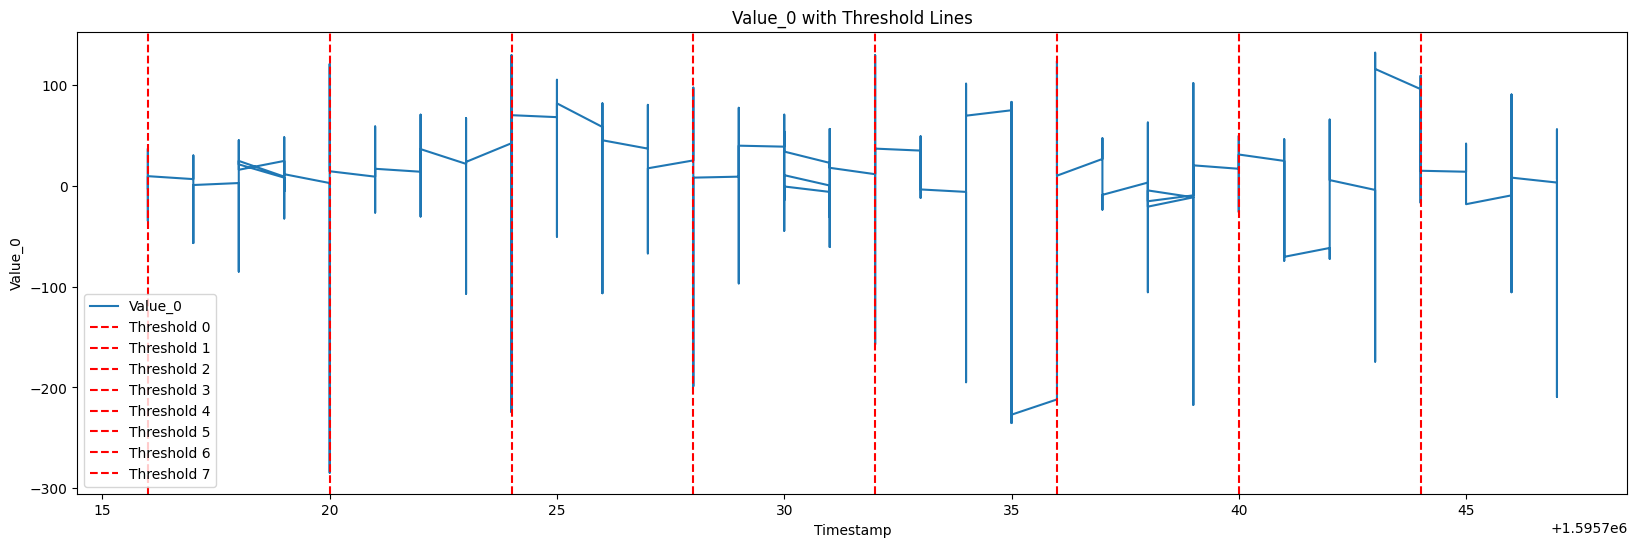

In [ ]:
import matplotlib.pyplot as plt

# 그래프 크기 설정
plt.figure(figsize=(20, 6))

# Value_0에 대한 그래프 플로팅
plt.plot(df['Timestamp'], df['Data'].apply(lambda x: x[0]), label='Value_0')

# Label 값이 변할 때마다 수직 점선 추가
for label_value in df['Label'].unique():
    plt.axvline(x=label_value * 4 + start_timestamp, color='r', linestyle='--', label=f'Threshold {label_value}')

# 그래프에 레이블과 제목 추가
plt.xlabel('Timestamp')
plt.ylabel('Value_0')
plt.title('Value_0 with Threshold Lines')
plt.legend()
plt.show()


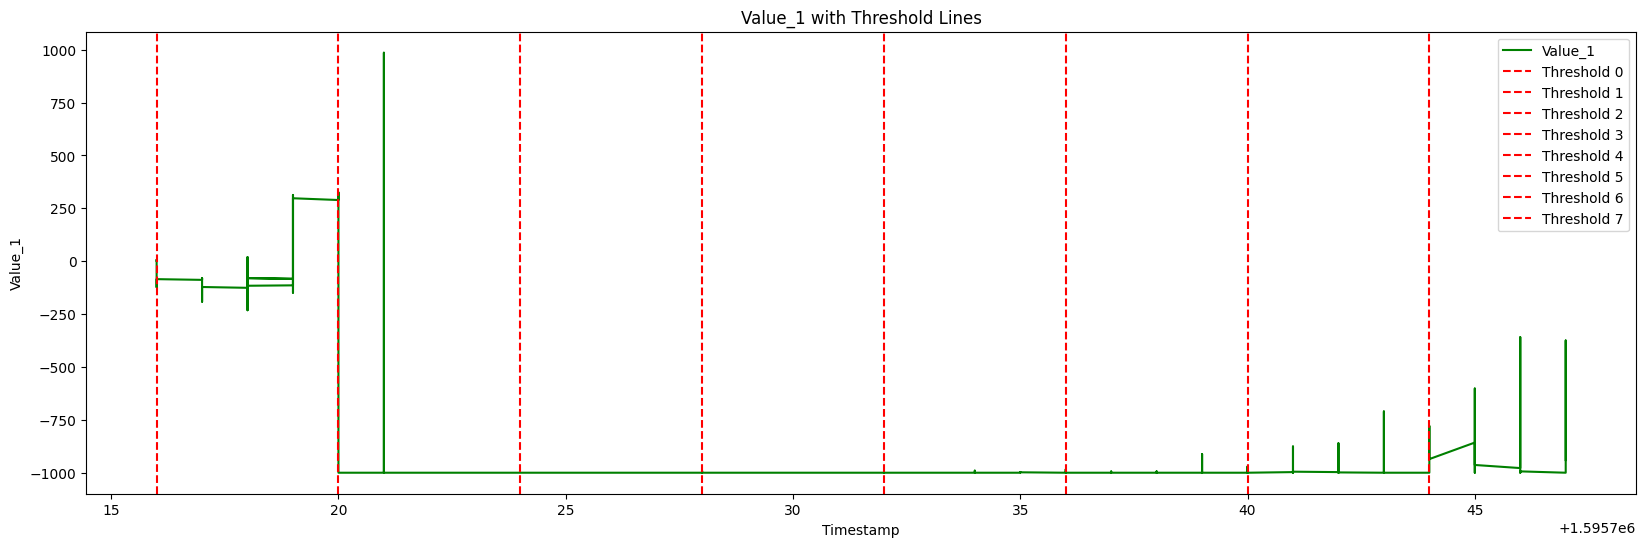

In [ ]:
import matplotlib.pyplot as plt

# 그래프 크기 설정
plt.figure(figsize=(20, 6))

# Value_1에 대한 그래프 플로팅 (예시로 빨간색 지정)
plt.plot(df['Timestamp'], df['Data'].apply(lambda x: x[1]), label='Value_1', color='green')  # 원하는 색상으로 변경

# Label 값이 변할 때마다 수직 점선 추가
for label_value in df['Label'].unique():
    plt.axvline(x=label_value * 4 + start_timestamp, color='r', linestyle='--', label=f'Threshold {label_value}')

# 그래프에 레이블과 제목 추가
plt.xlabel('Timestamp')
plt.ylabel('Value_1')
plt.title('Value_1 with Threshold Lines')
plt.legend()
plt.show()


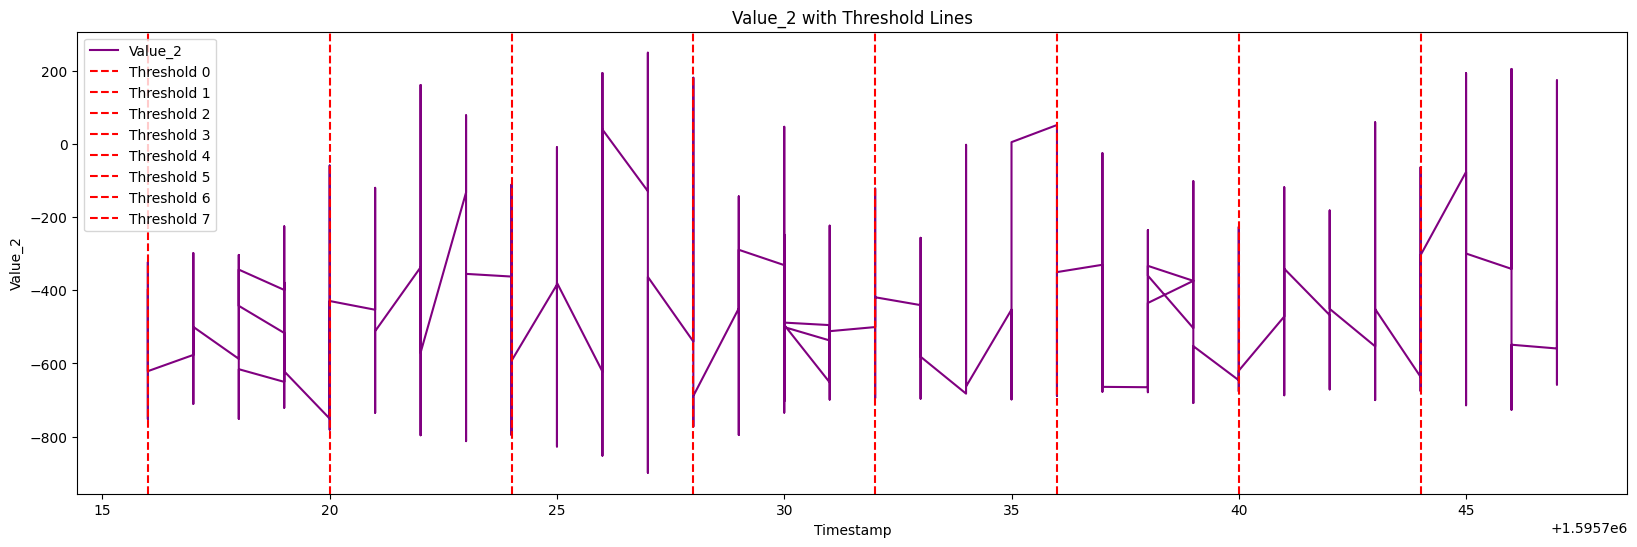

In [ ]:
import matplotlib.pyplot as plt

# 그래프 크기 설정
plt.figure(figsize=(20, 6))

# Value_1에 대한 그래프 플로팅 (예시로 빨간색 지정)
plt.plot(df['Timestamp'], df['Data'].apply(lambda x: x[2]), label='Value_2', color='purple')  # 원하는 색상으로 변경

# Label 값이 변할 때마다 수직 점선 추가
for label_value in df['Label'].unique():
    plt.axvline(x=label_value * 4 + start_timestamp, color='r', linestyle='--', label=f'Threshold {label_value}')

# 그래프에 레이블과 제목 추가
plt.xlabel('Timestamp')
plt.ylabel('Value_2')
plt.title('Value_2 with Threshold Lines')
plt.legend()
plt.show()


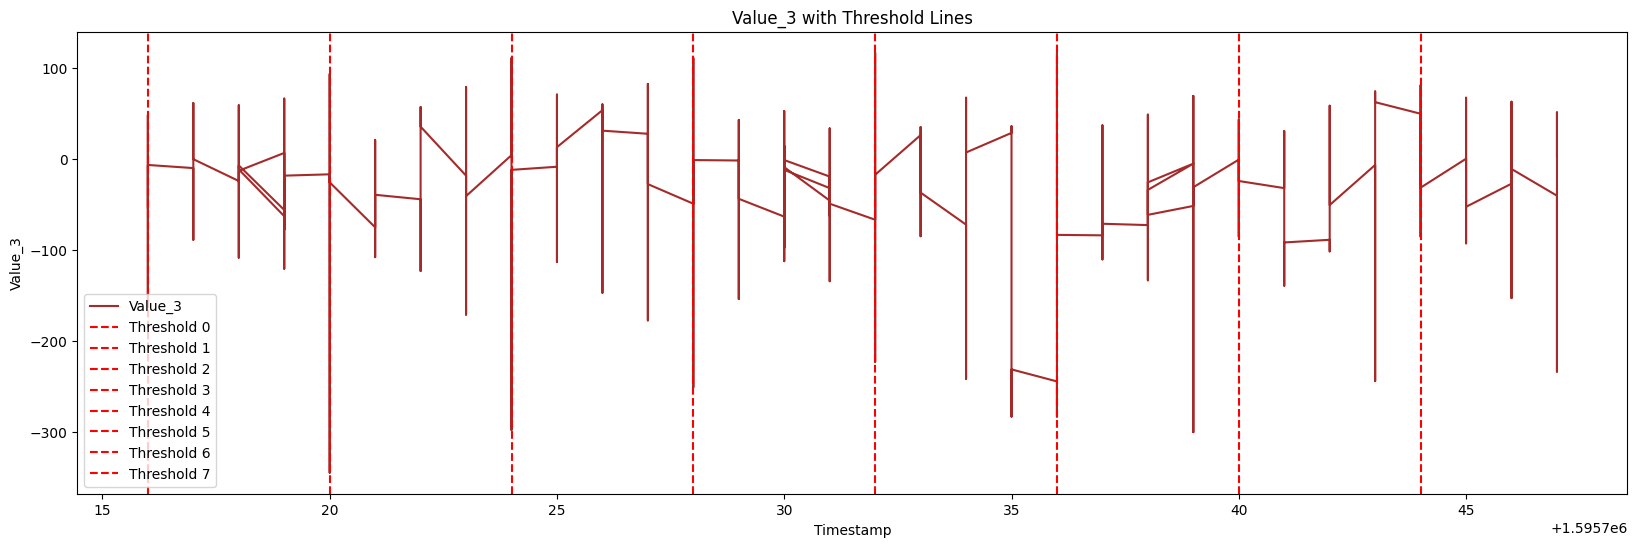

In [ ]:
import matplotlib.pyplot as plt

# 그래프 크기 설정
plt.figure(figsize=(20, 6))

# Value_1에 대한 그래프 플로팅 (예시로 빨간색 지정)
plt.plot(df['Timestamp'], df['Data'].apply(lambda x: x[3]), label='Value_3', color='brown')  # 원하는 색상으로 변경

# Label 값이 변할 때마다 수직 점선 추가
for label_value in df['Label'].unique():
    plt.axvline(x=label_value * 4 + start_timestamp, color='r', linestyle='--', label=f'Threshold {label_value}')

# 그래프에 레이블과 제목 추가
plt.xlabel('Timestamp')
plt.ylabel('Value_3')
plt.title('Value_3 with Threshold Lines')
plt.legend()
plt.show()


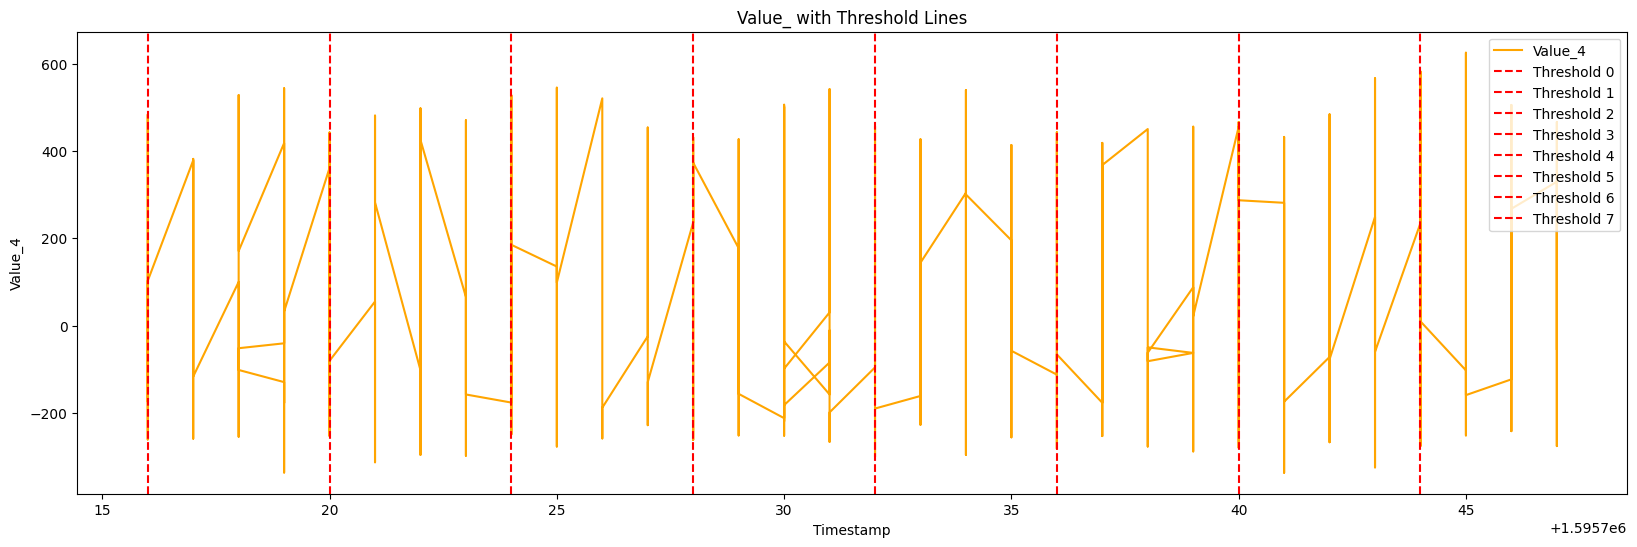

In [ ]:
import matplotlib.pyplot as plt

# 그래프 크기 설정
plt.figure(figsize=(20, 6))

# Value_2에 대한 그래프 플로팅 (예시로 빨간색 지정)
plt.plot(df['Timestamp'], df['Data'].apply(lambda x: x[4]), label='Value_4', color='orange')  # 원하는 색상으로 변경

# Label 값이 변할 때마다 수직 점선 추가
for label_value in df['Label'].unique():
    plt.axvline(x=label_value * 4 + start_timestamp, color='r', linestyle='--', label=f'Threshold {label_value}')

# 그래프에 레이블과 제목 추가
plt.xlabel('Timestamp')
plt.ylabel('Value_4')
plt.title('Value_ with Threshold Lines')
plt.legend()
plt.show()
